In [3]:
import sys

sys.path.append('..')

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

from dataset import ase_atoms_to_jraph_graph, generative_sequence
from qm9 import load_qm9

In [6]:
def draw_graph(
    positions: jnp.ndarray,
    senders: jnp.ndarray,
    receivers: jnp.ndarray,
    node_color: jnp.ndarray = None,
    edge_color: jnp.ndarray = None,
):
    positions -= positions.mean(axis=0)

    # if len(positions) > 1:
    #     cov = np.cov(positions.T)
    #     _, v = jnp.linalg.eigh(cov)
    #     positions = positions @ v

    if edge_color is None:
        edge_color = jnp.zeros_like(senders)
    if node_color is None:
        node_color = jnp.zeros_like(positions[:, 0])

    edge_color = edge_color.astype(jnp.float32)

    plt.scatter(
        positions[:, 1], positions[:, 2], c=node_color, cmap="tab10", zorder=2, s=100
    )
    plt.axis("equal")
    for s, r, c in zip(senders, receivers, edge_color):
        c = plt.cm.tab10(c)
        plt.plot(positions[[s, r], 1], positions[[s, r], 2], zorder=1, color=c)


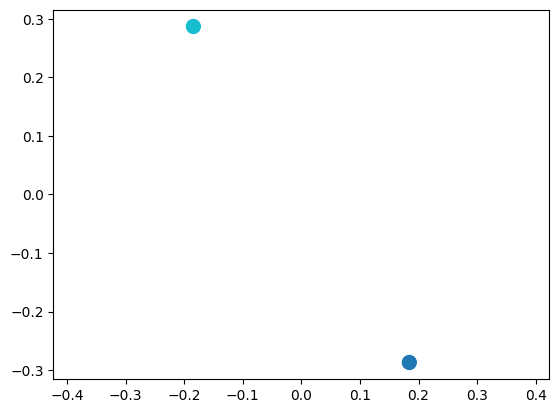

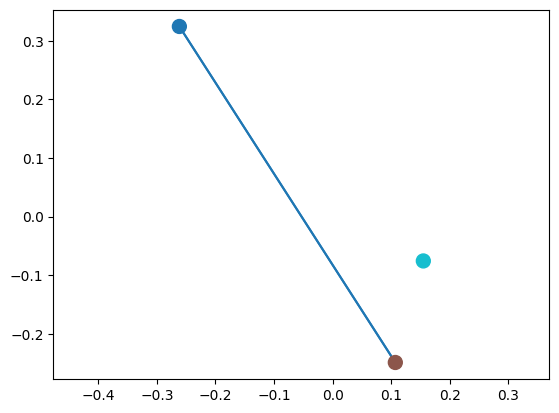

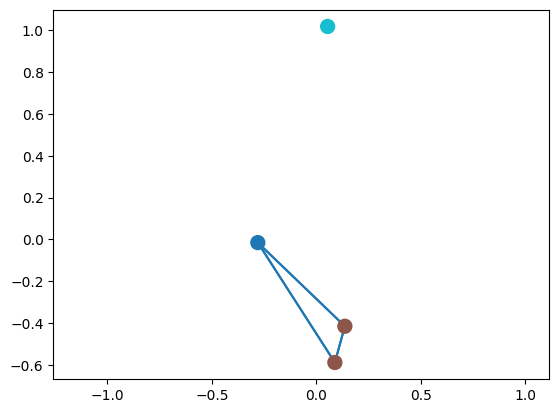

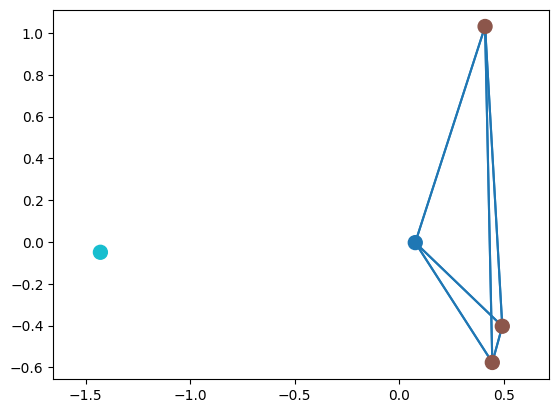

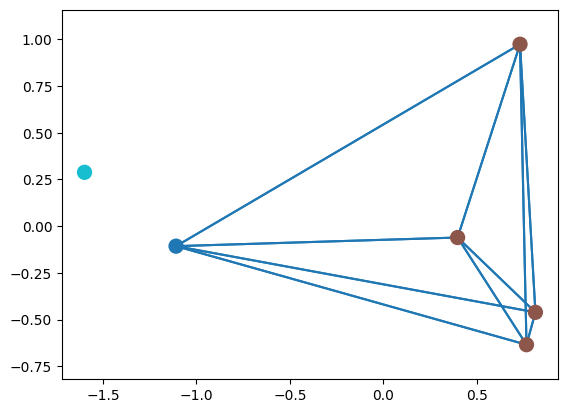

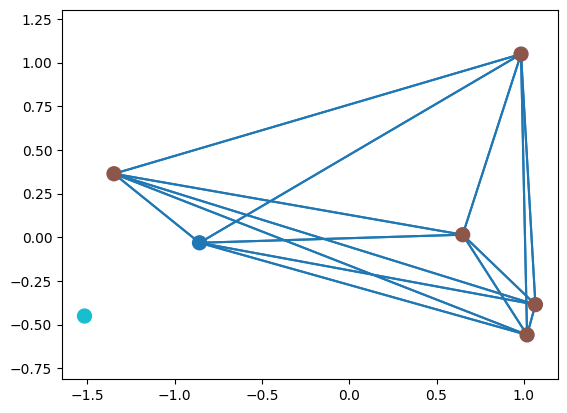

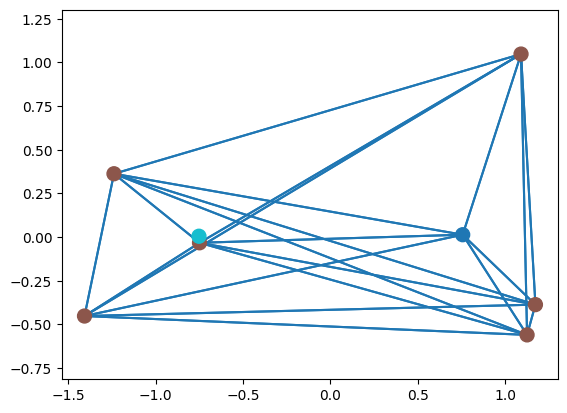

In [10]:
atoms = load_qm9("qm9_data")[10]
graph = ase_atoms_to_jraph_graph(atoms, cutoff=5.0)


for graph in generative_sequence(jax.random.PRNGKey(2), graph):
    plt.figure()
    n = len(graph.nodes.positions)
    draw_graph(
        jnp.concatenate([graph.nodes.positions, graph.globals.target_position]),
        graph.senders,
        graph.receivers,
        node_color=jnp.array([0] + [1] * (n - 1) + [2]),
    )
